打算写一个用于少数峰寻峰拟合的pypline，先用scipy.find_peaks()来寻峰，确定峰位置和风范围，然后用lmfit.models的buildin_model在范围内自动猜初值拟合。

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks
sns.set_theme('poster')
%config InlineBackend.figure_format = 'retina'

import os
# from lmfit.models import VoigtModel,GaussianModel,LorentzianModel

In [78]:
def peak_fitting(data,prominence,peak_type='gaussian',**peakfinding_params):
    peaks,info = find_peaks(data,prominence=prominence,**peakfinding_params)
    # print(peaks)
    peak_number = len(peaks)
    corrected_left_bases = []
    corrected_right_bases = []
    for i in range(peak_number):
        # Left_bases correction
        if i>0:
            if info['left_bases'][i]<peaks[i-1]:
                corrected_left_bases.append(info['right_bases'][i-1])
            else:
                corrected_left_bases.append(info['left_bases'][i])
        else:
            corrected_left_bases.append(info['left_bases'][i])
        # Right_bases correction
        if i<peak_number-1:
            if info['right_bases'][i]>peaks[i+1]:
                corrected_right_bases.append(info['left_bases'][i+1])
            else:
                corrected_right_bases.append(info['right_bases'][i])
        else:
            corrected_right_bases.append(info['right_bases'][i])
    corrected_left_bases = np.array(corrected_left_bases)
    corrected_right_bases = np.array(corrected_right_bases)


    if peak_type[0] in ['g','G']:
        from lmfit.models import GaussianModel
        peak_models = [GaussianModel(prefix=f'{i}_') for i in range(peak_number)]
    elif peak_type[0] in ['l','L']:
        from lmfit.models import LorentzianModel
        peak_models = [LorentzianModel(prefix=f'{i}_') for i in range(peak_number)]
    elif peak_type[0] in ['v','V']:
        from lmfit.models import VoigtModel
        peak_models = [VoigtModel(prefix=f'{i}_') for i in range(peak_number)]
    
    for i in range(peak_number):
        peak_models[i].set_param_hint('amplitude',min=0)


# Draft

In [3]:
def open_mca_data(file_name):
    with open(file_name, 'r', encoding='ansi') as file:
        content = file.readlines()
    data = False
    datas = []
    for i in content:
        if i =='<<END>>\n':
            data = False
        if data:
            datas.append(eval(i))
        if i =='<<DATA>>\n':
            data = True
    datas = np.array(datas)
    return datas

In [62]:
data = open_mca_data(r'raw_data\Cu25_6.mca')
peak_fitting(data, prominence=20,width = 10)

(array([788, 872], dtype=int64),
 array([765, 853], dtype=int64),
 array([814, 890], dtype=int64))

In [77]:
data = open_mca_data(r'raw_data\Cu25_6.mca')
# peaks,info = find_peaks(data, prominence=20,width = 10)
peaks,left_bases,right_bases = peak_fitting(data, prominence=20,width = 10)

plt.plot(data)
plt.scatter(peaks,data[peaks],c='r',marker='x')
plt.scatter(left_bases,data[left_bases],c='green',marker='o')
plt.scatter(right_bases,data[right_bases],c='purple',marker='o')

plt.show()

gaussian


TypeError: cannot unpack non-iterable NoneType object

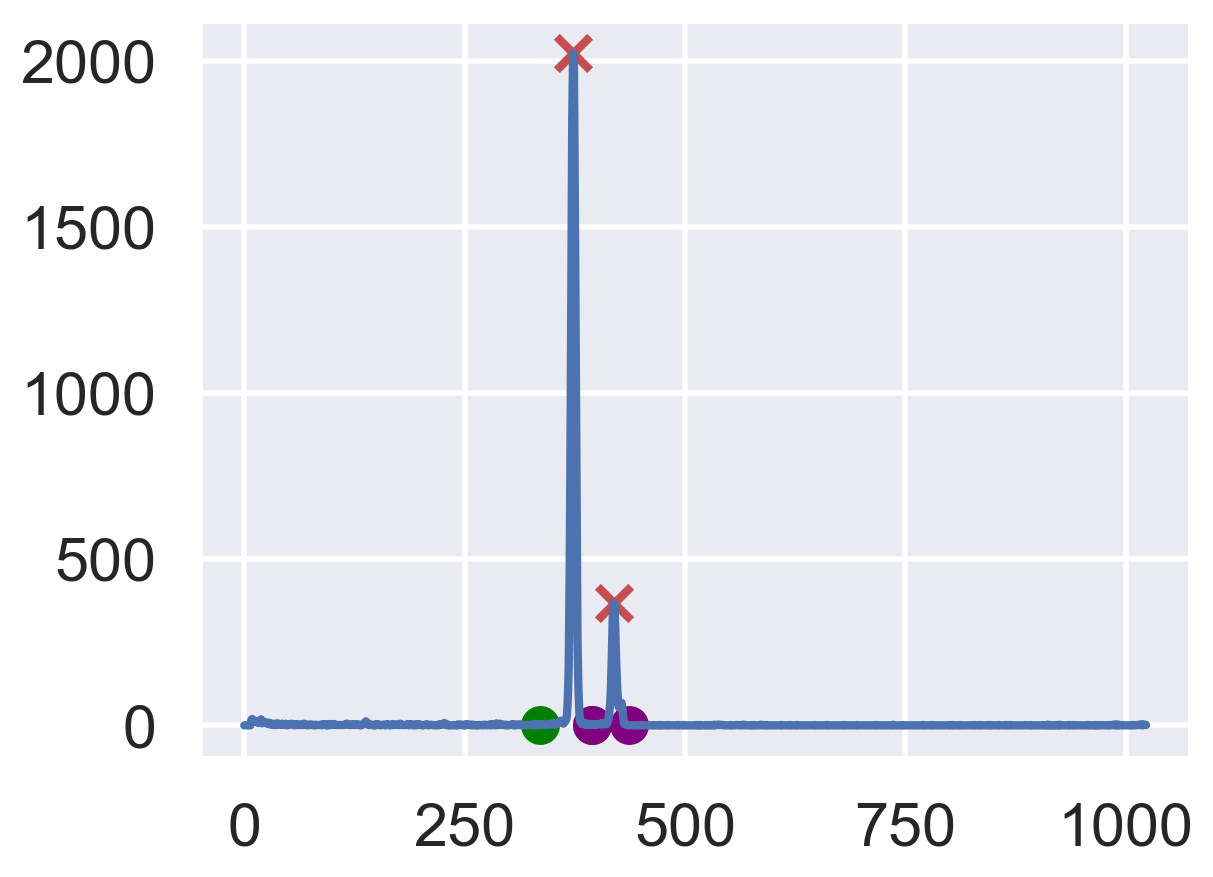

(array([373, 419], dtype=int64),
 array([335, 394], dtype=int64),
 array([394, 436], dtype=int64))

In [70]:
data = open_mca_data(r'raw_data\Mo.mca')
# peaks,info = find_peaks(data, prominence=20,width = 10)
peaks,left_bases,right_bases = peak_fitting(data, prominence=300)

plt.plot(data)
plt.scatter(peaks,data[peaks],c='r',marker='x')
plt.scatter(left_bases,data[left_bases],c='green',marker='o')
plt.scatter(right_bases,data[right_bases],c='purple',marker='o')

plt.show()
peaks,left_bases,right_bases

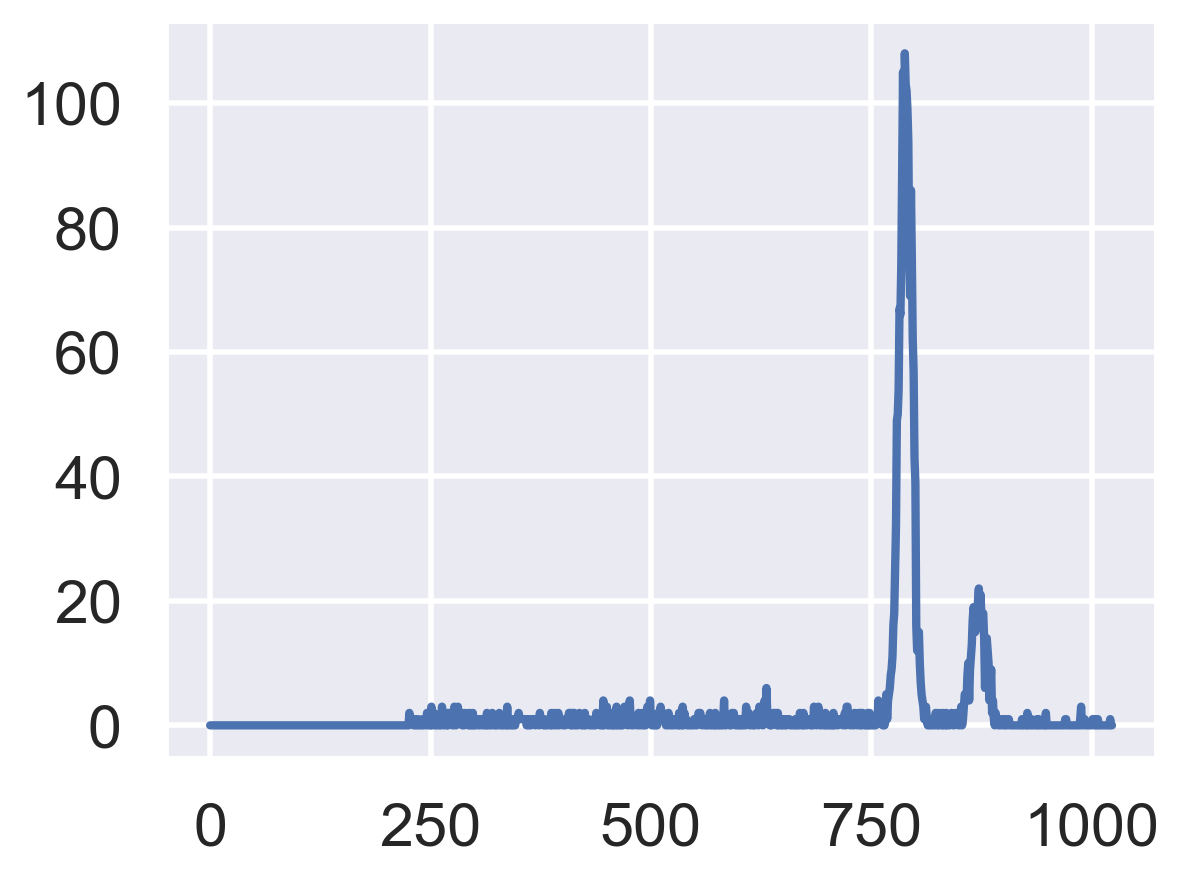

In [67]:
data = open_mca_data(r'raw_data\Cu25_6.mca')
peaks,info = find_peaks(data, prominence=300)

plt.plot(data)
plt.scatter(peaks,data[peaks],c='r',marker='x')
plt.scatter(info['left_bases'],data[info['left_bases']],c='green',marker='o')
plt.scatter(info['right_bases'],data[info['right_bases']],c='purple',marker='o')

plt.show()

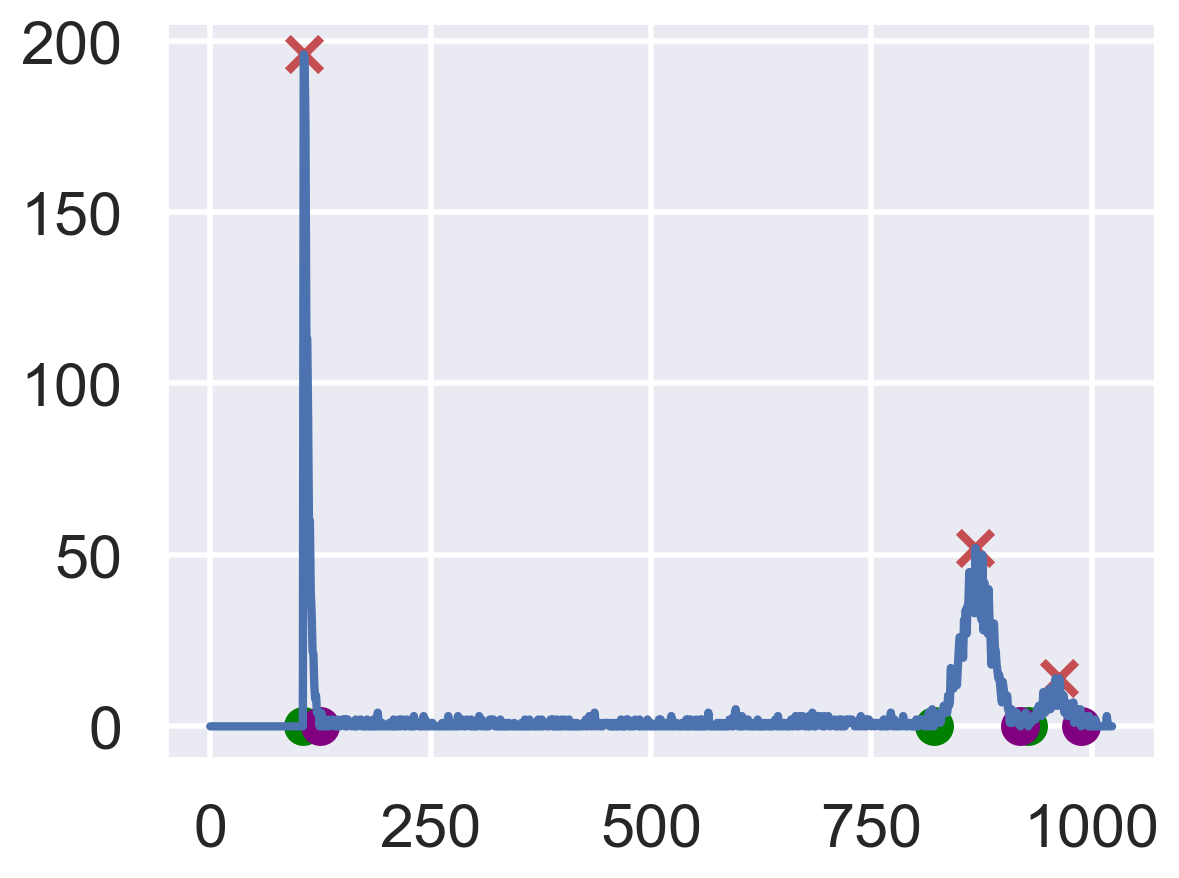

In [41]:
data = open_mca_data(r'raw_data\Cu0_8.mca')
peaks,info = find_peaks(data, prominence=10,width = 2,distance=12)

plt.plot(data)
plt.scatter(peaks,data[peaks],c='r',marker='x')
plt.scatter(info['left_bases'],data[info['left_bases']],c='green',marker='o')
plt.scatter(info['right_bases'],data[info['right_bases']],c='purple',marker='o')

plt.show()

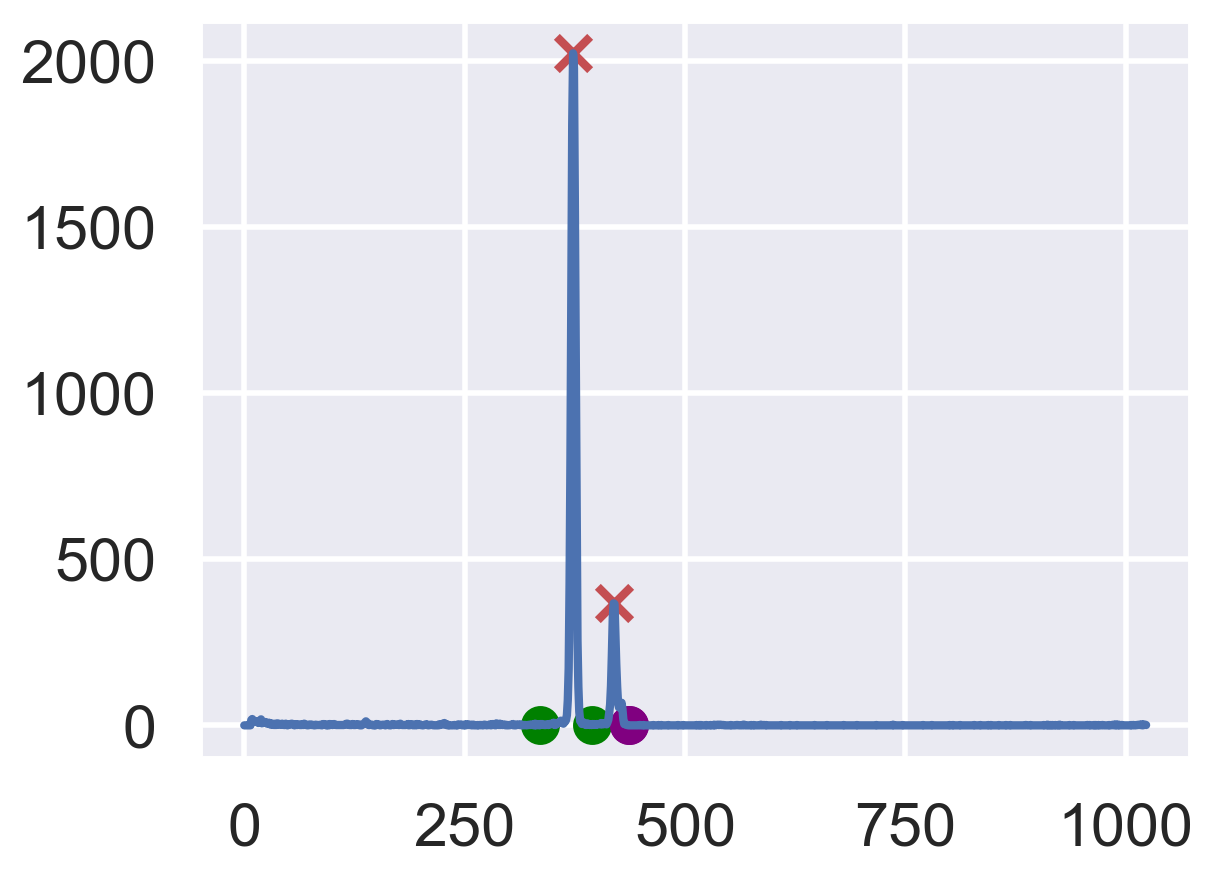

{'prominences': array([2022.,  366.]),
 'left_bases': array([335, 394], dtype=int64),
 'right_bases': array([436, 436], dtype=int64)}

In [46]:
data = open_mca_data(r'raw_data\Mo.mca')
peaks,info = find_peaks(data, prominence=300,distance=12)

plt.plot(data)
plt.scatter(peaks,data[peaks],c='r',marker='x')
plt.scatter(info['left_bases'],data[info['left_bases']],c='green',marker='o')
plt.scatter(info['right_bases'],data[info['right_bases']],c='purple',marker='o')

plt.show()
info